# Life Expectancy and GDP

In this project, we shall analyze data about GDP and life expectancy from the World Health Organization and the World Bank to identify the relationship between the GDP and life expectancy of six countries.

## 1. Load the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [2]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

This dataset contains **GDP and Life Expectancy** data from the 6 Countries above, from 2000 to 2015.

## 2. Explore the dataset

In [3]:
# Check for NaN's:
df.isna().any()

Country                             False
Year                                False
Life expectancy at birth (years)    False
GDP                                 False
dtype: bool

In [4]:
# Check for Duplicated Values:
df.duplicated().sum()

0

In [5]:
# Change the name of 1 column:
df = df.rename(columns = {'Life expectancy at birth (years)': 'Life_expectancy'})

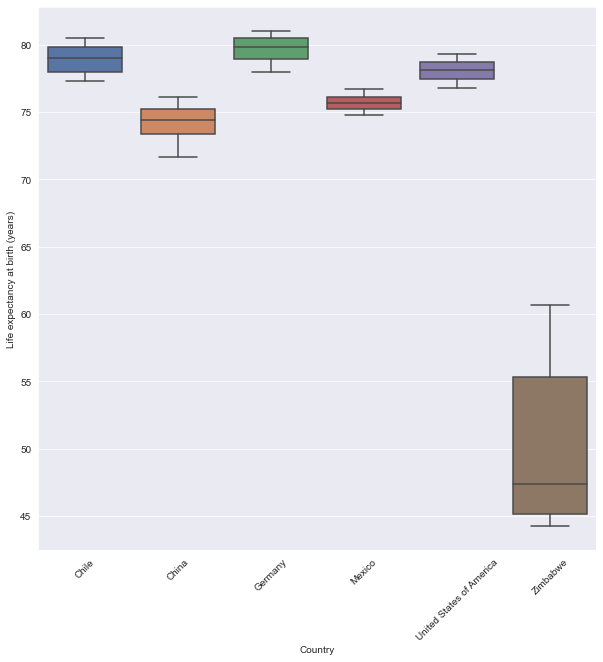

<Figure size 432x288 with 0 Axes>

In [6]:
# Check for outliers (Life_expectancy):
sns.set_palette("deep")
sns.set_style('darkgrid')

fig = plt.figure(figsize = (10,10))
sns.boxplot(data = df, x = 'Country' , y = 'Life_expectancy')
plt.xticks(rotation = 45)
plt.ylabel('Life expectancy at birth (years)')
plt.show()
plt.clf()

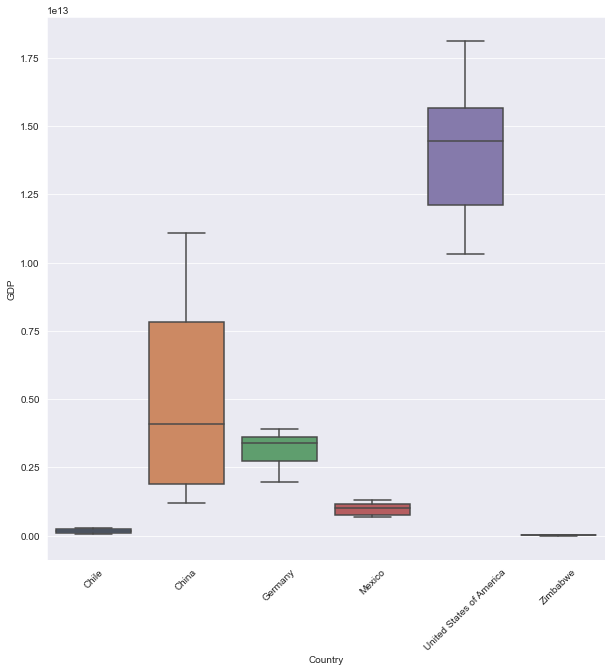

<Figure size 432x288 with 0 Axes>

In [7]:
# Check for outliers (GDP):
fig = plt.figure(figsize = (10,10))
sns.boxplot(data = df, x = 'Country' , y = 'GDP')
plt.xticks(rotation = 45)
plt.show()
plt.clf()

In [8]:
# Check the Skewness:
df.skew().sort_values(ascending=False)

GDP                1.410353
Year               0.000000
Life_expectancy   -1.844935
dtype: float64

## Question 1: Has life expectancy increased over time in the six nations?

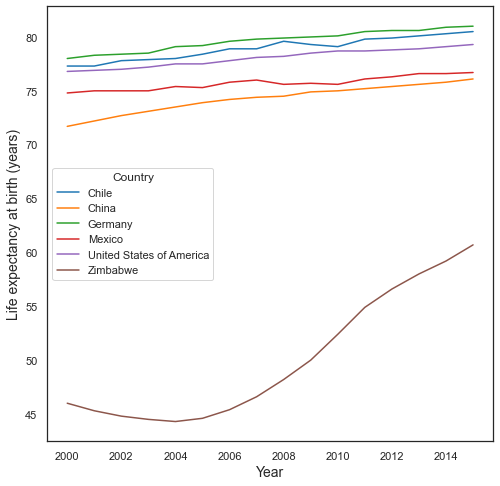

<Figure size 432x288 with 0 Axes>

In [9]:
sns.set_theme(style="white", palette='tab10')
fig = plt.figure(figsize=(8,8))
sns.lineplot(data = df, x = 'Year', y = 'Life_expectancy', hue = 'Country')
plt.ylabel('Life expectancy at birth (years)', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.show()
plt.clf()

- Germany has the best Life Expectancy among the 6 nations;
- Over this period, Chile has surprisingly a higher Life Expectancy than the US;
- Zimbabwe showed a steep improvement since 2005, but it is still far behind the other nations.

## Question 2: Has GDP increased over time in the six nations?

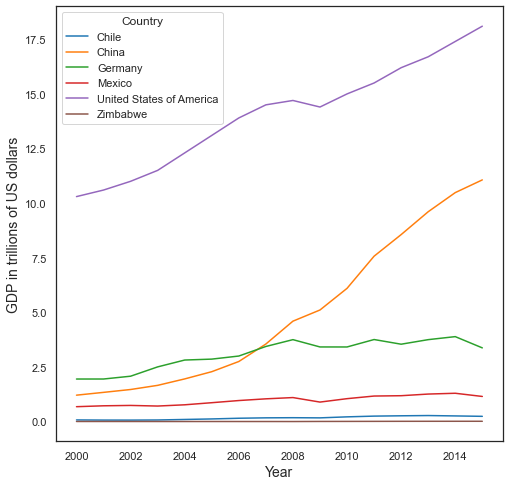

<Figure size 432x288 with 0 Axes>

In [10]:
def trillions(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x*1e-12)

def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x*1e-9)


from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(trillions)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
sns.lineplot(data = df, x = 'Year', y = 'GDP', hue = 'Country')
ax.yaxis.set_major_formatter(formatter)
plt.ylabel('GDP in trillions of US dollars', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.show()
plt.clf()

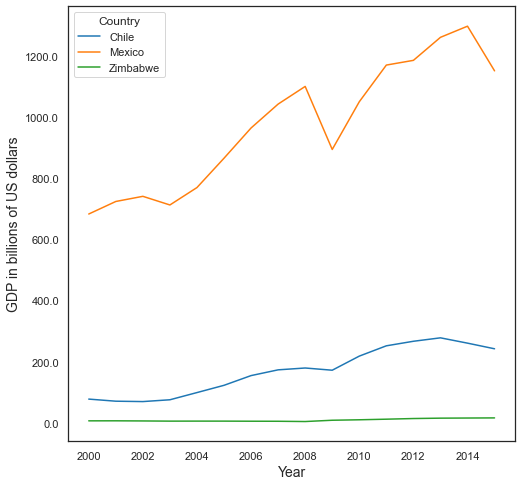

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot Mexico, Chile and Zimbabwe separetely for better Visualization:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
list = ['Chile', 'Mexico', 'Zimbabwe']
sns.lineplot(data = df[df.Country.isin(list)], x = 'Year', y = 'GDP', hue = 'Country')
ax.yaxis.set_major_formatter(FuncFormatter(billions))
plt.ylabel('GDP in billions of US dollars', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.show()
plt.clf()

- US and China's GDP had a great increase from 2000 to 2015;
- On the other hand, Chile and Zimbabwe's GDP remained fairly stable.

## Question 3: Is there a correlation between GDP and life expectancy of a country?

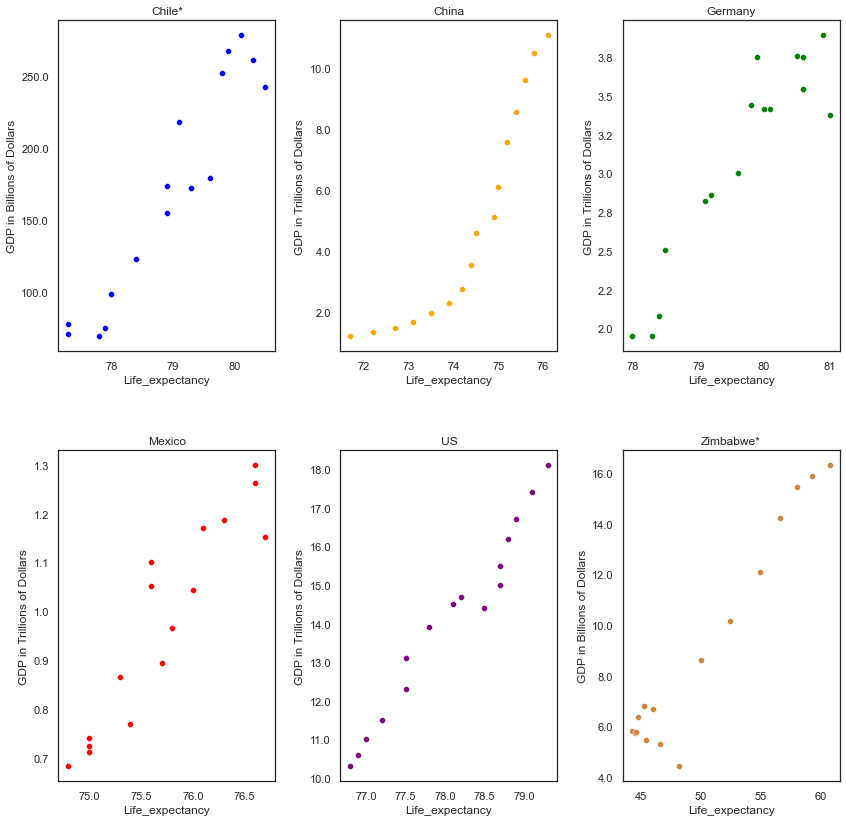

In [12]:
fig = plt.figure(figsize = (14,14))
ax1 = fig.add_subplot(2,3,1)
sns.scatterplot(data = df[df.Country == 'Chile'], x = 'Life_expectancy', y = 'GDP', color = 'blue')
ax1.yaxis.set_major_formatter(FuncFormatter(billions))
ax1.set_title('Chile*')
plt.ylabel('GDP in Billions of Dollars')
ax2 = fig.add_subplot(2,3,2)
sns.scatterplot(data = df[df.Country == 'China'], x = 'Life_expectancy', y = 'GDP', color = 'orange')
ax2.yaxis.set_major_formatter(formatter)
ax2.set_title('China')
plt.ylabel('GDP in Trillions of Dollars')
ax3 = fig.add_subplot(2,3,3)
sns.scatterplot(data = df[df.Country == 'Germany'], x = 'Life_expectancy', y = 'GDP', color = 'green')
ax3.yaxis.set_major_formatter(formatter)
ax3.set_title('Germany')
plt.ylabel('GDP in Trillions of Dollars')
ax4 = fig.add_subplot(2,3,4)
sns.scatterplot(data = df[df.Country == 'Mexico'], x = 'Life_expectancy', y = 'GDP', color = 'red')
ax4.yaxis.set_major_formatter(formatter)
ax4.set_title('Mexico')
plt.ylabel('GDP in Trillions of Dollars')
ax5 = fig.add_subplot(2,3,5)
sns.scatterplot(data = df[df.Country == 'United States of America'], x = 'Life_expectancy', y = 'GDP', color = 'purple')
ax5.yaxis.set_major_formatter(formatter)
ax5.set_title('US')
plt.ylabel('GDP in Trillions of Dollars')
ax6 = fig.add_subplot(2,3,6)
sns.scatterplot(data = df[df.Country == 'Zimbabwe'], x = 'Life_expectancy', y = 'GDP', color = 'peru')
ax6.yaxis.set_major_formatter(FuncFormatter(billions))
ax6.set_title('Zimbabwe*')
plt.ylabel('GDP in Billions of Dollars')
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()

*Please note: Chile and Zimbabwe's GDP are in _billions_ of dollars. The other countries' GDP are in _trillions_ of dollars.

As we can see in the graph above, there is a **strong positive correlation** between Life Expectancy and GDP for the 6 nations.

## Question 4: What is the average life expectancy in these nations?

In [13]:
# Group Life Expectancy by Country:
df_group = df.groupby('Country').Life_expectancy.mean().round().reset_index()
print('Mean Life Expectancy in years: \n \n', df_group)

Mean Life Expectancy in years: 
 
                     Country  Life_expectancy
0                     Chile             79.0
1                     China             74.0
2                   Germany             80.0
3                    Mexico             76.0
4  United States of America             78.0
5                  Zimbabwe             50.0


- Zimbabwe has an extremely low Life Expectancy compared to the other nations.
- Germany and Chile have the highest Life Expectancies.